## **1. 測試 Numpy 和 TensorFlow 運算效能**

Numpy 在 CPU 上運算完成，而TensorFlow則在GPU上完成，測試兩種不同套件執行相同運算所花費的時間

In [6]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [7]:
# numpy 模式
start_times = time.time()
x = np.ones((1000, 500, 50)) * 6
end_times = time.time()
print("It cost {} sec".format(end_times - start_times))

It cost 0.07098054885864258 sec


In [8]:
# tensoflw 模式
start_times = time.time()
y = tf.ones((1000, 500, 50)) * 6
end_times = time.time()
print("It cost {} sec".format(end_times - start_times))

It cost 0.08162808418273926 sec


## **2. Multi Input and Multi Output Model**

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image

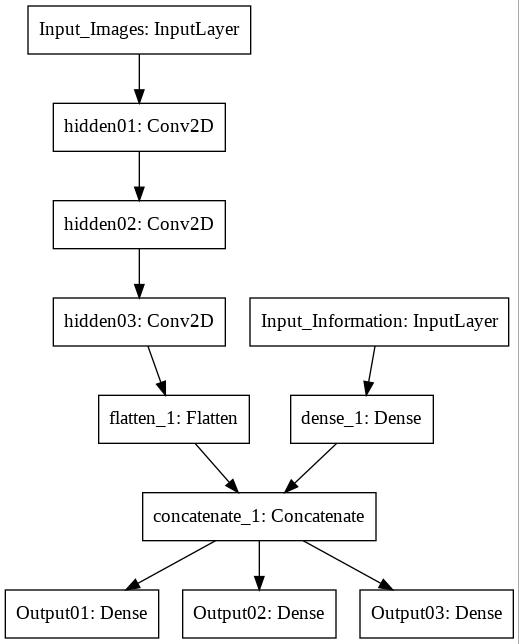

In [10]:
input_images = keras.Input(shape=(35, 35, 1), name='Input_Images')
hidden1 = layers.Conv2D(64, kernel_size=3, activation='relu', name='hidden01')(input_images)
hidden2 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden02')(hidden1)
hidden3 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden03')(hidden2)
flatten = layers.Flatten()(hidden3)

input_infos = keras.Input(shape=(10, ), name='Input_Information')
hidden4 = layers.Dense(64)(input_infos)

concat = layers.Concatenate()([flatten, hidden4])

output_weathers = layers.Dense(1, name='Output01')(concat)
output_temps = layers.Dense(1, name='Output02')(concat)
output_humidites = layers.Dense(1, name='Output03')(concat)

model = keras.Model(inputs=[input_images, input_infos], 
                    outputs=[output_weathers, output_temps, output_humidites])



# 產生網絡拓撲圖
plot_model(model, to_file='Functional API Multi Input and Multi Output Model.jpg')

# 秀出網絡拓撲圖
Image('Functional API Multi Input and Multi Output Model.jpg')

3. tf.data 讀取資料

dataset 中參數為 [0, 1, 2, 3, ..., 84] 共84個數值，透過對 dataset 設定，每一次取21 筆資料，並對整個 dataset 重複提取 4 次。

In [11]:
import tensorflow as tf

In [12]:
tfdataset = tf.data.Dataset.from_tensor_slices(tf.range(84))
tfdataset = tfdataset.batch(21).repeat(4)
for tfdata in tfdataset:
    print(tfdata)

tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20], shape=(21,), dtype=int32)
tf.Tensor([21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41], shape=(21,), dtype=int32)
tf.Tensor([42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62], shape=(21,), dtype=int32)
tf.Tensor([63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83], shape=(21,), dtype=int32)
tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20], shape=(21,), dtype=int32)
tf.Tensor([21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41], shape=(21,), dtype=int32)
tf.Tensor([42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62], shape=(21,), dtype=int32)
tf.Tensor([63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83], shape=(21,), dtype=int32)
tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20], shape=(21,), dtype=int32)
tf.Tensor([21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41], shape=